In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [102]:
HC = np.array([0.7,1.5,	1.4,1.7,1.7,2.1,1.5,1.4,		2.2,	2.0,	1.1,		1.0,	1.2,	1.0, 0.9,	1.6,	1.3, 0.7, 1
])
OC = np.array([0.2,	0.4,0.5,0.4,0.1,0.2,0.1,0.2,		0.0,	0.0,	0.0,		0.1,	0.4,	0.4, 0.5,	1.0,	1.0, 0.2, 0.4

])
fuels = np.array(['Coal',	'Digestate',	'Wood',	'Sewage',	'Car',	'EBS1',	'EBS_1.1',	'EBS_2',	'PE',	'PP',	'PS',	'Gummi',	'HTC_MSW',	'HTC_GreenCut', 'Lignin', 'Hemicellulose', 'Cellulose', 'Torr_Coal', 'Torr_Washed'])


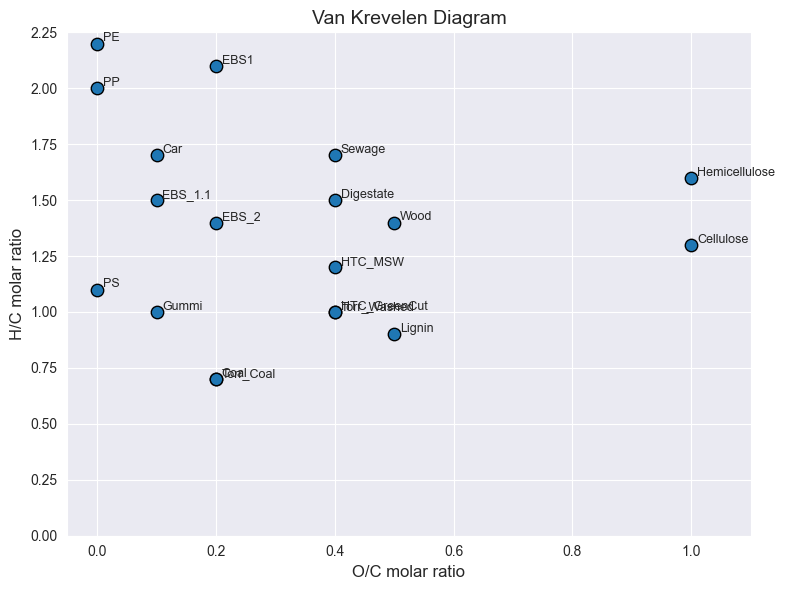

In [103]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(OC, HC, c='tab:blue', s=80, edgecolor='k')

# Annotate each point
for i, label in enumerate(fuels):
    plt.annotate(label, (OC[i] + 0.01, HC[i] + 0.01), fontsize=9)

# Label axes
plt.xlabel("O/C molar ratio", fontsize=12)
plt.ylabel("H/C molar ratio", fontsize=12)
plt.title("Van Krevelen Diagram", fontsize=14)
plt.grid(True)
plt.xlim(-0.05, 1.1)
plt.ylim(0, 2.25)

# Show the plot
plt.tight_layout()
plt.show()

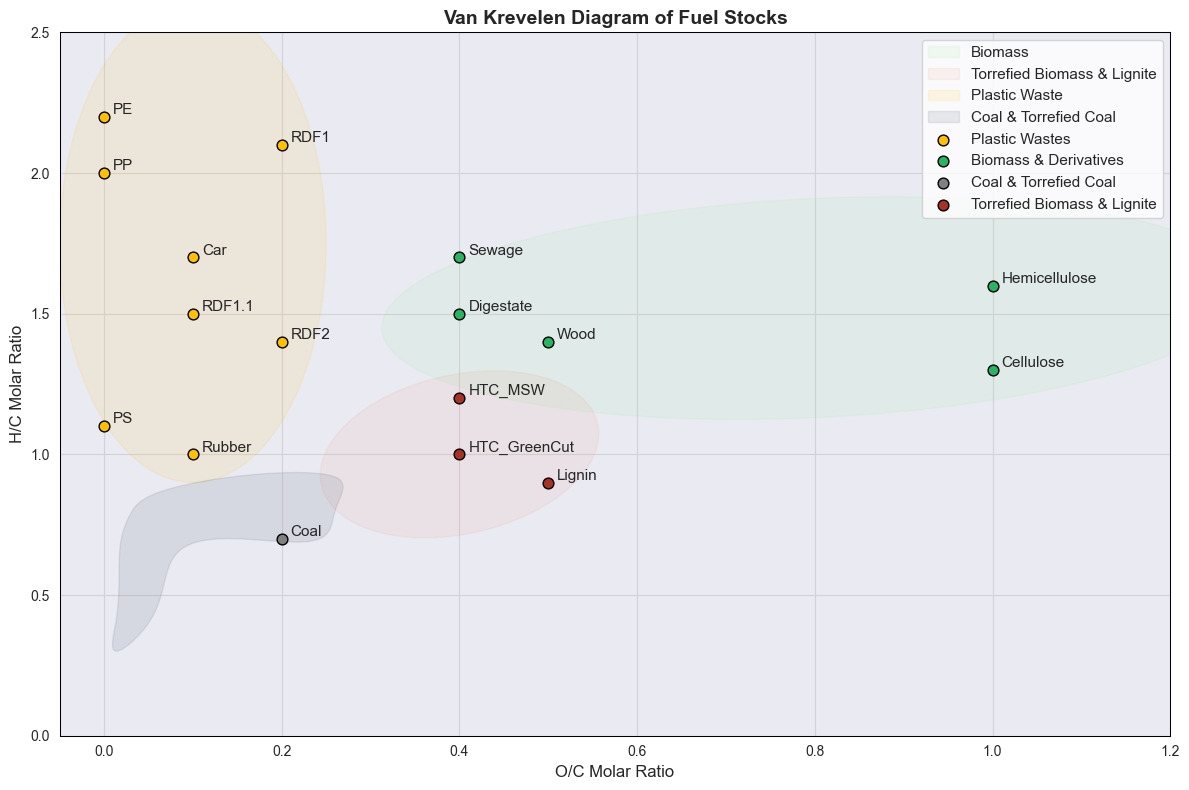

In [328]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Polygon
from scipy.interpolate import splprep, splev

# Data
HC = np.array([0.7, 1.5, 1.4, 1.7, 1.7, 2.1, 1.5, 1.4, 2.2, 2.0, 1.1, 1.0, 1.2, 1.0, 0.9, 1.6, 1.3])
OC = np.array([0.2, 0.4, 0.5, 0.4, 0.1, 0.2, 0.1, 0.2, 0.0, 0.0, 0.0, 0.1, 0.4, 0.4, 0.5, 1.0, 1.0])
fuels = np.array(['Coal', 'Digestate', 'Wood', 'Sewage', 'Car', 'RDF1', 'RDF1.1', 'RDF2', 'PE', 'PP', 'PS', 'Rubber',
                  'HTC_MSW', 'HTC_GreenCut', 'Lignin', 'Hemicellulose', 'Cellulose'])  # added a few extras to match length

# Cluster indices
cluster1_labels = ['Car', 'RDF1', 'RDF1.1', 'RDF2', 'PE', 'PP', 'PS', 'Rubber']
cluster2_labels = ['Digestate', 'Wood', 'Sewage',  'Hemicellulose', 'Cellulose', ]
cluster3_labels = ['Coal']
cluster4_labels = ['HTC_MSW', 'HTC_GreenCut', 'Lignin']

# Map cluster labels to indices
cluster1_idx = [i for i, f in enumerate(fuels) if f in cluster1_labels]
cluster2_idx = [i for i, f in enumerate(fuels) if f in cluster2_labels]
cluster3_idx = [i for i, f in enumerate(fuels) if f in cluster3_labels]
cluster4_idx = [i for i, f in enumerate(fuels) if f in cluster4_labels]

clusters = [cluster1_idx, cluster2_idx, cluster3_idx, cluster4_idx]
colors = ['#FFC000', '#28b463', '#808080', '#a93226']  # light red, green, grey
labels = ['Plastic Wastes', 'Biomass & Derivatives', 'Coal & Torrefied Coal', 'Torrefied Biomass & Lignite']

# Plot
fig, ax = plt.subplots(figsize=(12, 8))

# Custom cluster areas (approximate based on your image)
# Biomass Zone (Green Ellipse-like)
biomass_patch = Ellipse((0.8, 1.52), width=0.76, height=1, angle=110
                        , color='#90EE90', alpha=0.1, label='Biomass')
ax.add_patch(biomass_patch)

peat_patch = Ellipse((0.4, 1), width=0.6, height=0.3, angle=80
                        , color='#E9967A', alpha=0.1, label='Torrefied Biomass & Lignite')
ax.add_patch(peat_patch)

plastic_patch = Ellipse((0.1, 1.75), width=0.3, height=1.7, angle=0
                        , color='#FFC000', alpha=0.1, label='Plastic Waste')
ax.add_patch(plastic_patch)

# Original polygon points
x = np.array([0.013,0.013,0.03, 0.05, 0.26,0.26,0.23,0.15,0.05, 0.025 ])
y = np.array([0.3,0.4,0.79, 0.85, 0.92,0.8,0.69, 0.7,0.4,0.3])

# Create spline
tck, u = splprep([x, y], s=0, per=True)
unew = np.linspace(0, 1.0, 100)
out = splev(unew, tck)

# Plot smooth polygon
ax.fill(out[0], out[1], color='#2e4053', alpha=0.1, label='Coal & Torrefied Coal')


# Plot points
for i, idx in enumerate(clusters):
    x, y = OC[idx], HC[idx]
    ax.scatter(x, y, color=colors[i], s=60, edgecolor='k', label=labels[i])

# Annotate points
for i, label in enumerate(fuels):
    ax.annotate(label, (OC[i] + 0.01, HC[i] + 0.01), fontsize=11)

for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_edgecolor('black')     # Frame color
    spine.set_linewidth(0.75)

# Axis labels and title
ax.set_xlabel("O/C Molar Ratio", fontsize=12)
ax.set_ylabel("H/C Molar Ratio", fontsize=12)
ax.set_title("Van Krevelen Diagram of Fuel Stocks", fontsize=14, fontweight='bold')
ax.grid(True, color='#d3d3d3')

ax.set_xlim(-0.05, 1.2)
ax.set_ylim(0, 2.50)
ax.legend(frameon = True, fontsize=11, facecolor='white', loc='upper right')
plt.tight_layout()
plt.savefig(r"C:\Users\demir\OneDrive\Desktop\MSc Thesis\Figures & Tables\van_kravelen.png", transparent=True, dpi=300)
plt.show()
